Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.1  
Zadnji put ažurirano: 16. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić, Mladen Karan 

Objavljeno: **16. listopada 2017.**  
Rok za predaju: **23. listopada 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matrixom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [3]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

print('X:\n', X)
print('y:\n', y)

X:
 [[0]
 [1]
 [2]
 [4]]
y:
 [4 1 2 5]


#### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, True)
dm = poly.fit_transform(X)

print('Φ:\n', dm)

Φ:
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


#### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

In [6]:
w = dot(dot(inv(dot(dm.transpose(), dm)), dm.transpose()), y)
print('w:', w)

w = dot(pinv(dm), y)
print('w:', w)

w: [2.2        0.45714286]
w: [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

#### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{x}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [7]:
from sklearn.metrics import mean_squared_error

h = dot(dm, w)
error = np.sum(np.power(y - h, 2)) / 2

print('Error:\t\t\t', error)
print('Mean squared error:\t', mean_squared_error(y, h))

Error:			 4.085714285714286
Mean squared error:	 2.042857142857143


**A:** Mean squared error nema 1/2 nego 1/N, zato je za 4 primjera pogreska ispala duplo manja od dane formule.

#### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [8]:
w = dot(inv(dm), y)

LinAlgError: Last 2 dimensions of the array must be square

In [9]:
poly = PolynomialFeatures(3, False)
dm = poly.fit_transform(X)

print('Φ:\n', dm)

w = dot(inv(dm), y)

print('w:\n', w)

Φ:
 [[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
w:
 [ 4.         -5.91666667  3.375      -0.45833333]


**A:** Matrica primjera bi trebala biti kvadratna, ako preslikamo primjere u vecu dimenziju, mozemo izracunati inverz. Ne bi uvijek funkcioniralo, jer moramo dic dimenziju na N, pa ako imamo puno primjera zauzeli bi previse memorije?

#### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [10]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y)

w = [linreg.intercept_, linreg.coef_[0]]
h = linreg.predict(X)
error = np.sum(np.power(y - h, 2)) / 2

print('w:', w)
print('error:', error)

w: [2.2, 0.45714285714285713]
error: 4.085714285714286


### 2. Polinomijalna regresija i utjecaj šuma

#### (a)

Razmotrimo sada regresiju na većem broju primjera. Koristite funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma koristi se funkcija [`numpy.random.normal`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [11]:
from numpy.random import normal
def make_labels(X, f, noise=0) :
    return map(lambda x : f(x) + (normal(0,noise) if noise>0 else 0), X)

In [12]:
def make_instances(x1, x2, N) :
    return sp.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [13]:
def f(x):
    return 5 + x - 2 * x**2 - 5 * x**3

N = 50
noise = 200
x_start = -5
x_end = 5

X = make_instances(x_start, x_end, N)
y = np.array(list(make_labels(X, f, noise)))

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

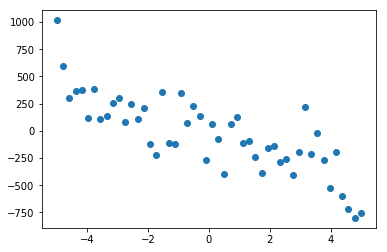

In [14]:
plt.scatter(X, y)
plt.show()

#### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

error: 842331.3246395369


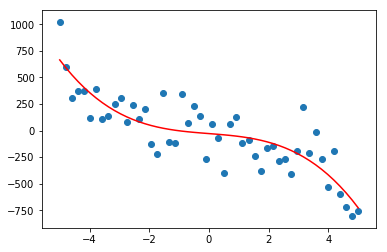

In [15]:
deg = 3

poly = PolynomialFeatures(deg)
dm = poly.fit_transform(X)

linreg = LinearRegression()
linreg.fit(dm, y)

h = linreg.predict(dm)
error = np.sum(np.power(y - h, 2)) / 2

print('error:', error)

plt.plot(X, h, c='red')
plt.scatter(X, y)
plt.show()

### 3. Odabir modela

#### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Degree:   1	Error:   1063286.27
Degree:   3	Error:    842331.32
Degree:   5	Error:    703862.67
Degree:  10	Error:    595452.95
Degree:  20	Error:    477035.73


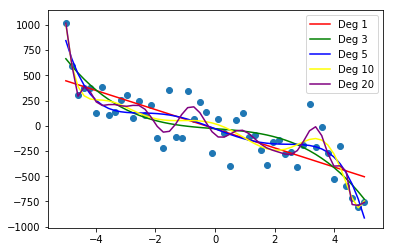

In [16]:
colors = ['red', 'green', 'blue', 'yellow', 'purple']
degs = [1, 3, 5, 10, 20]

for i, deg in enumerate(degs):
    poly = PolynomialFeatures(deg)
    dm = poly.fit_transform(X)

    linreg = LinearRegression()
    linreg.fit(dm, y)
    
    h = linreg.predict(dm)
    error = np.sum(np.power(y - h, 2)) / 2

    print('Degree: {:>3d}\tError: {:>12.2f}'.format(deg, error))

    plt.plot(X, h, c=colors[i], label='Deg ' + str(deg))

plt.scatter(X, y)
plt.legend()
plt.show()

**A:** Model s najvecim stupnjem ima najmanju pogresku ucenja jer je jako ekspresivan i pokorava se sumu.

#### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Radi preciznosti, funkcije $h(\mathbf{x})$ iscrtajte na cijelom skupu primjera (ali pogrešku generalizacije računajte, naravno, samo na ispitnome skupu). Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [17]:
from sklearn import cross_validation

Degree:   1	Train:    394603.85	Test:            702571.85
Degree:   2	Train:    374721.12	Test:            748261.92
Degree:   3	Train:    358868.84	Test:            607378.52
Degree:   4	Train:    351786.95	Test:            621670.82
Degree:   5	Train:    265476.78	Test:            532748.32
Degree:   6	Train:    260610.46	Test:            539429.59
Degree:   7	Train:    247269.97	Test:            631452.53
Degree:   8	Train:    247124.30	Test:            652712.50
Degree:   9	Train:    245020.75	Test:            719821.40
Degree:  10	Train:    146661.21	Test:           1231331.69
Degree:  11	Train:    144562.81	Test:           1336119.01
Degree:  12	Train:    144541.68	Test:           1358430.01
Degree:  13	Train:    143386.30	Test:           1218120.72
Degree:  14	Train:    131827.91	Test:           2560056.28
Degree:  15	Train:    121904.44	Test:           8113072.78
Degree:  16	Train:     77675.49	Test:           3953165.33
Degree:  17	Train:     70007.26	Test:          37701770.

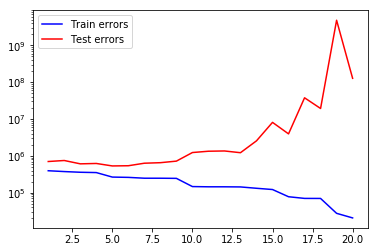

In [18]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5)

degs = range(1, 21)

train_errors = []
test_errors = []

for i, deg in enumerate(degs) :
    poly = PolynomialFeatures(deg)
    dm_train = poly.fit_transform(X_train)
    dm_test = poly.fit_transform(X_test)

    linreg = LinearRegression()
    linreg.fit(dm_train, y_train)
    
    h_train= linreg.predict(dm_train)
    h_test = linreg.predict(dm_test)
    error_train = np.sum(np.power(y_train - h_train, 2)) / 2
    error_test = np.sum(np.power(y_test - h_test, 2)) / 2
    
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    print('Degree: {:>3d}\tTrain: {:>12.2f}\tTest: {:>20.2f}'.format(deg, error_train, error_test))

plt.plot(degs, train_errors, label='Train errors', c='blue')
plt.plot(degs, test_errors, label='Test errors', c='red')
plt.yscale('log')
plt.legend()
plt.show()

**A:** Je. Ocekivali smo da ce najmanju pogresku testiranja imati model ciji je stupanj isti stupnju funkcije koji je generirao podatke. Dakle, odabrali bi model sa stupnjem 3.

**A:** Problem je sto se nasumicno odreduju skup za ucenje i skup za testiranje, pa se u nekim pokretanjima moze dogoditi da u skupu za ucenje dobijemo primjere koji nisu dovoljno dobro rasporedeni. Pomoglo bi da imamo vise primjera, jer bi bila manja sansa da nam skup za testiranje bude lose distribuiran.

#### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za sve kombinacija broja primjera $N\in\{100,200,1000\}$ i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

***Q:*** Jesu li rezultati očekivani? Obrazložite.

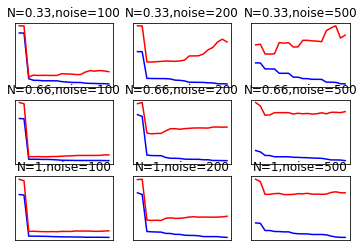

In [19]:
N_coefs = [0.33, 0.66, 1]
noises = [100, 200, 500]
degs = range(1, 21)

x_start = -5
x_end = 5
N = 1000

# podijeli sve primjere u skup za treniranje i testiranje
X = make_instances(x_start, x_end, N)
X_train, X_test = cross_validation.train_test_split(X, test_size=0.5)

# za sve sumove razlicito labelirani skupovi
y_train = np.empty(3, dtype=object)
y_test = np.empty(3, dtype=object)
for i, noise in enumerate(noises):
    y_train[i] = np.array(list(make_labels(X_train, f, noise)))
    y_test[i] = np.array(list(make_labels(X_test, f, noise)))

# uzorkovani primjeri za svaki graf
X_trains = np.empty([3, 3], dtype=object)
y_trains = np.empty([3, 3], dtype=object)
X_tests = np.empty([3, 3], dtype=object)
y_tests = np.empty([3, 3], dtype=object)
for i, N_coef in enumerate(N_coefs):
    for j, noise in enumerate(noises):
        X_trains[i][j], _, y_trains[i][j], _ = cross_validation.train_test_split(X_train, y_train[j], test_size=1-N_coef)
        X_tests[i][j], _, y_tests[i][j], _ = cross_validation.train_test_split(X_test, y_test[j], test_size=1-N_coef)
        
# treniranje, testiranje i crtanje
_, plots = plt.subplots(3, 3)
for i, N_coef in enumerate(N_coefs):
    for j, noise in enumerate(noises):
        train_errors = []
        test_errors = []

        for deg in degs:
            poly = PolynomialFeatures(deg)
            dm_train = poly.fit_transform(X_trains[i][j])
            dm_test = poly.fit_transform(X_tests[i][j])

            linreg = LinearRegression()
            linreg.fit(dm_train, y_trains[i][j])

            h_train= linreg.predict(dm_train)
            h_test = linreg.predict(dm_test)
            error_train = np.sum(np.power(y_trains[i][j] - h_train, 2)) / 2
            error_test = np.sum(np.power(y_tests[i][j] - h_test, 2)) / 2

            train_errors.append(error_train)
            test_errors.append(error_test)
        
        plots[i, j].plot(degs, train_errors, c='blue')
        plots[i, j].plot(degs, test_errors, c='red')
        plots[i, j].get_xaxis().set_ticks([])
        plots[i, j].get_yaxis().set_ticks([])
        plots[i, j].set_title('N=' + str(N_coef) + ',noise=' + str(noise))
        
plt.show()

**A:** Ocekivali smo da je u svim slucajevima najlakse uciti model s najmanjom kolicinom suma i najvecim brojem primjera? Otprilike je tako i ispalo (dolje lijevi graf).

### 4. Regularizirana regresija

#### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [20]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

In [21]:
lbds = [0, 1, 10]
deg = 3

poly = PolynomialFeatures(deg)
dm = poly.fit_transform(X)
print('Φ shape:', dm.shape)

idt = np.identity(deg + 1)
for lbd in lbds:
    w = dot(dot(inv(dot(dm.transpose(), dm) + idt * lbd), dm.transpose()), y)
    print('λ:', lbd, '\tw:', w)

Φ shape: (4, 4)
λ: 0 	w: [ 4.         -5.91666667  3.375      -0.45833333]
λ: 1 	w: [ 1.79567372 -0.24729075 -0.0175289   0.07014758]
λ: 10 	w: [0.43312265 0.11060671 0.13827839 0.03093411]


**A:** Matrica koju treba invertirati je kvadratna.

**A:** S vecim stupnjem regularizacije tezine su manje. Rezultat je ocekivan jer je zadatak regularizacije da vuce tezine prema nuli.

#### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [22]:
from sklearn.linear_model import Ridge

In [23]:
for lbd in [0, 1, 10]:
    ridge = Ridge(lbd)
    ridge.fit(dm, y)
    w = [ridge.intercept_] + ridge.coef_.tolist()[1:]

    print('λ:', lbd, '\tw:', w)

λ: 0 	w: [4.000000000000021, -5.916666666666765, 3.375000000000054, -0.4583333333333407]
λ: 1 	w: [3.0569614512471652, -0.6907936507936514, -0.283174603174602, 0.1445804988662129]
λ: 10 	w: [2.4944418431229725, -0.1589729487341473, -0.13423066536848305, 0.08156009919705869]


**A:** Nisu iste, ovdje tezine sporije konvergiraju. Mozda se jedinicna matrica mnozi nekim faktorom manjim od 1?

### 5. Regularizirana polinomijalna regresija

#### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

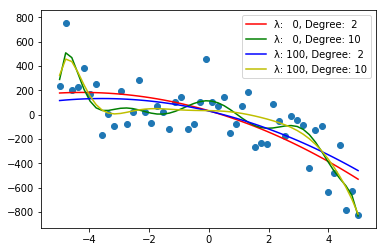

In [24]:
lbds = [0, 100]
degs = [2, 10]

colors = ['r', 'g', 'b', 'y']
i = 0

x_start = -5
x_end = 5
N = 50
noise = 200

X = make_instances(x_start, x_end, N)
y = np.array(list(make_labels(X, f, noise)))

for lbd in lbds:
    for deg in degs:
        poly = PolynomialFeatures(deg)
        dm = poly.fit_transform(X)

        ridge = Ridge(lbd)
        ridge.fit(dm, y)

        plt.plot(X, ridge.predict(dm), c=colors[i], label='λ: {:3d}, Degree: {:2d}'.format(lbd, deg))
        i += 1

plt.scatter(X, y)
plt.legend()
plt.show()

**A:** Regularizacija ne utjece toliko na model s manjim stupnjem, ali se vidi kod modela s vecim stupnjem da ga regularizacija "smiri", ne pokorava se toliko sumu kao model bez regularizacije.

#### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=20,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


λ:   1	Train:     93831.32	Test:        1205639959.82
λ:   2	Train:     96621.55	Test:        1166457986.47
λ:   3	Train:     97812.34	Test:        1166007710.94
λ:   4	Train:     98485.53	Test:        1167085121.51
λ:   5	Train:     98926.87	Test:        1153015789.40
λ:   6	Train:     99243.69	Test:        1143412745.13
λ:   7	Train:     99484.81	Test:        1151400081.04
λ:   8	Train:     99678.28	Test:        1148914344.70
λ:   9	Train:     99841.65	Test:        1153863756.02
λ:  10	Train:     99981.30	Test:        1149009171.85
λ:  11	Train:    100101.02	Test:        1140471229.35
λ:  12	Train:    100211.47	Test:        1143947378.48
λ:  13	Train:    100306.12	Test:        1142182104.11
λ:  14	Train:    100397.22	Test:        1138846511.51
λ:  15	Train:    100483.34	Test:        1136208682.63
λ:  16	Train:    100564.03	Test:        1137910174.01
λ:  17	Train:    100638.43	Test:        1136102609.27
λ:  18	Train:    100707.29	Test:        1135251074.13
λ:  19	Train:    100769.07	T

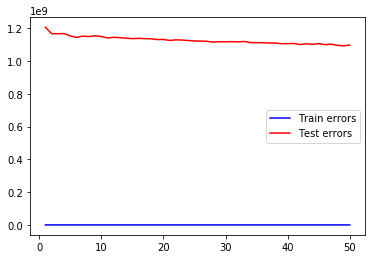

In [25]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5)

deg = 20
lbds = range(1, 51)

train_errors = []
test_errors = []

poly = PolynomialFeatures(deg)
dm_train = poly.fit_transform(X_train)
dm_test = poly.fit_transform(X_test)

for i, lbd in enumerate(lbds) :
    ridge = Ridge(lbd)
    ridge.fit(dm_train, y_train)
    
    h_train= ridge.predict(dm_train)
    h_test = ridge.predict(dm_test)
    error_train = np.sum(np.power(y_train - h_train, 2)) / 2
    error_test = np.sum(np.power(y_test - h_test, 2)) / 2
    
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    print('λ: {:>3d}\tTrain: {:>12.2f}\tTest: {:>20.2f}'.format(lbd, error_train, error_test))

plt.plot(lbds, train_errors, label='Train errors', c='blue')
plt.plot(lbds, test_errors, label='Test errors', c='red')
plt.legend()
plt.show()

**A:** Na lijevoj strani grafa je model prenaucen, jer je regularizacijski faktor mali i model je preekspresivan. Prema desnoj strani grafa pogreska testiranja pada jer se model zbog vece regularizacije manje pokorava sumu.
    
**A:** Po ovom grafu uzeo bi veliki regularizacijski faktor, jer za ovaj stupanj modela daje dobre rezultate.

P.s. ovo su moje pretpostavke, jer mi svako pokretanje algoritma daje drugacije rezultate, mozda povecati broj primjera?

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije:

In [26]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[sp.isclose(0, coef, atol=tol)])

#### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=20$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [27]:
from sklearn.linear_model import Ridge

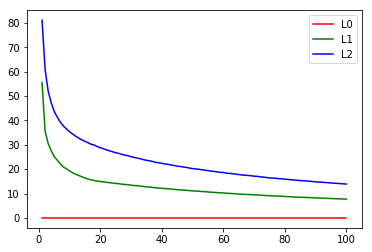

In [28]:
deg = 20
lbds = range(1, 101)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5)

l0_norms = []
l1_norms = []
l2_norms = []

poly = PolynomialFeatures(deg)
dm_train = poly.fit_transform(X_train)
dm_test = poly.fit_transform(X_test)

for lbd in lbds:
    ridge = Ridge(lbd)
    ridge.fit(dm_train, y_train)
    
    l0_norms.append(nonzeroes(ridge.coef_))
    l1_norms.append(norm(ridge.coef_, 1))
    l2_norms.append(norm(ridge.coef_, 2))

plt.plot(lbds, l0_norms, c='red', label='L0')
plt.plot(lbds, l1_norms, c='green', label='L1')
plt.plot(lbds, l2_norms, c='blue', label='L2')
plt.legend()
plt.show()

**A:** Ne znam, ima veze [s ovim](https://2.bp.blogspot.com/-bx18zSHaWd8/WCFBi_fr8AI/AAAAAAAAAlc/WJCI4s-GaYY4oWnzOyughmi4JAz6_OMUwCLcB/s1600/L%255Ep%2Bunit%2Bballs.png). Nece skroz doseci nulu, ali zelimo da se sto vise priblizi, jer zelimo rijetke modele, zato sto onda mozemo eliminirati parametre koji nam ne utjecu puno u odluci modela, a manje parametara = brzi model.

**A:** Ne toliko veliki postotak kao kod L1 regresije.

// todo: teska nagadanja, provjeriti

#### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [29]:
from sklearn.linear_model import Lasso

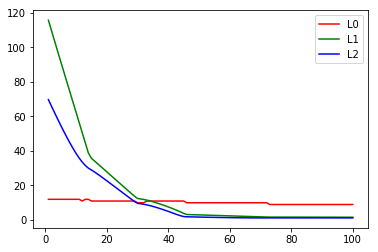

In [30]:
deg = 20
lbds = range(1, 101)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5)

l0_norms = []
l1_norms = []
l2_norms = []

poly = PolynomialFeatures(deg)
dm_train = poly.fit_transform(X_train)
dm_test = poly.fit_transform(X_test)

for lbd in lbds:
    lasso = Lasso(lbd)
    lasso.fit(dm_train, y_train)
    
    l0_norms.append(nonzeroes(lasso.coef_))
    l1_norms.append(norm(lasso.coef_, 1))
    l2_norms.append(norm(lasso.coef_, 2))

plt.plot(lbds, l0_norms, c='red', label='L0')
plt.plot(lbds, l1_norms, c='green', label='L1')
plt.plot(lbds, l2_norms, c='blue', label='L2')
plt.legend()
plt.show()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [31]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)**

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

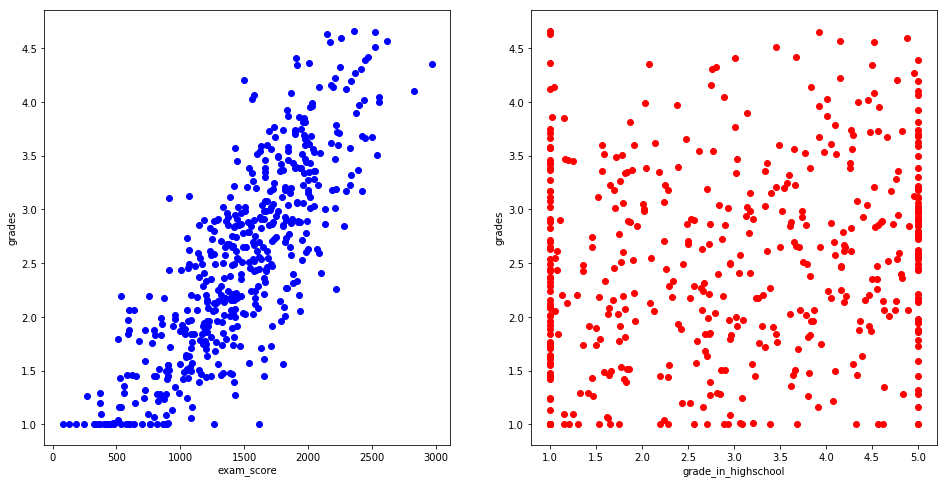

In [32]:
_, plots = plt.subplots(1, 2, figsize=(16, 8))

plots[0].scatter(exam_score, grades_y, c='b')
plots[0].set_xlabel('exam_score')
plots[0].set_ylabel('grades')

plots[1].scatter(grade_in_highschool, grades_y, c='r')
plots[1].set_xlabel('grade_in_highschool')
plots[1].set_ylabel('grades')

plt.show()

**b)**

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [33]:
lbd = 0.01

ridge = Ridge(lbd)
ridge.fit(grades_X, grades_y)

w = [ridge.intercept_] + ridge.coef_.tolist()[1:]

print('w:', w)

w: [0.1506117957577593, 0.09477275879174113]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(grades_X)

grades_X_fixed = scaler.transform(grades_X)

ridge = Ridge(lbd)
ridge.fit(grades_X_fixed, grades_y)

w = [ridge.intercept_] + ridge.coef_.tolist()[1:]

print('w:', w)

w: [2.5030316359918503, 0.1374153888494734]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

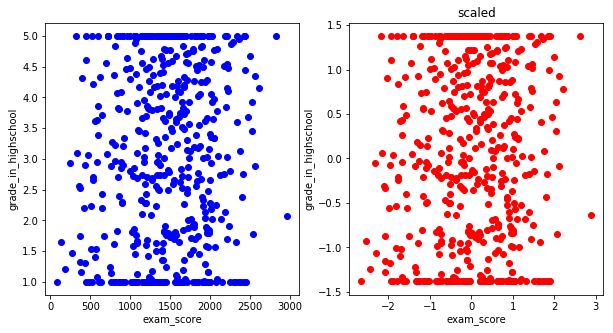

In [35]:
_, plots = plt.subplots(1, 2, figsize=(10, 5))

plots[0].scatter(grades_X[:,0], grades_X[:,1], c='b')
plots[0].set_xlabel('exam_score')
plots[0].set_ylabel('grade_in_highschool')
plots[1].set_title('not_scaled')

plots[1].scatter(grades_X_fixed[:,0], grades_X_fixed[:,1], c='r')
plots[1].set_xlabel('exam_score')
plots[1].set_ylabel('grade_in_highschool')
plots[1].set_title('scaled')

plt.show()

**A:** Po grafikonima bodovi na prijamnom su bolje korelirani s ocjenom na faksu. U prvom primjeru tezine su otprilike iste, ali nakon skaliranja po tezinama vidimo da bodovi s prijamnog puno vise utjecu na odluku.

Zasto? Nisam siguran sto se tu dogada, ali moja pretpostavka je da skaliranjem dobijemo neutralniju skalu (vidim na grafovima iznad da se samo skala promijenila, tj. oba parametra imaju istu srednju vrijednost i slicnu varijancu) i da zbog toga vise dolazi do izrazaja koji parametar je bolje koreliran s ciljnom vrijednosti.

// todo: provjeriti

### 8. Multikolinearnost i kondicija matrice

**a)**

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka 7b duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [36]:
grades_X_fixed_colinear = np.hstack([grades_X_fixed, grades_X_fixed[:,1].reshape(-1, 1)])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [37]:
lbd = 0.01

ridge = Ridge(lbd)
ridge.fit(grades_X_fixed_colinear, grades_y)

w = [ridge.intercept_] + ridge.coef_.tolist()[1:]

print('w:', w)

w: [2.5030316359918503, 0.0687083852786828, 0.06870838527886358]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**A:** Tezina za drugi parametar raspolovila se na svaki od ova dva kopirana parametra.

// todo: zasto?

**b)**

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$, a jedan s $\lambda=1000$. Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [38]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)**

Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_fixed_X_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.

In [39]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  